## Predicting faulty water pumps

Loading necessary libraries

In [37]:
import sys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
np.set_printoptions(threshold=sys.maxsize)

pd.set_option('display.max_columns', 50)
#np.set_printoptions(threshold=100)

Loading necessary feature values for data and insepcting it 

In [2]:
data = pd.read_csv("data/train features.csv")
labels =pd.read_csv("data/train labels.csv")

In [3]:
data.head()

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,subvillage,region,region_code,district_code,lga,ward,population,public_meeting,recorded_by,scheme_management,scheme_name,permit,construction_year,extraction_type,extraction_type_group,extraction_type_class,management,management_group,payment,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
0,69572,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,0,Lake Nyasa,Mnyusi B,Iringa,11,5,Ludewa,Mundindi,109,True,GeoData Consultants Ltd,VWC,Roman,False,1999,gravity,gravity,gravity,vwc,user-group,pay annually,annually,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe
1,8776,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,Lake Victoria,Nyamara,Mara,20,2,Serengeti,Natta,280,NaN,GeoData Consultants Ltd,Other,NaN,True,2010,gravity,gravity,gravity,wug,user-group,never pay,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe
2,34310,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,Pangani,Majengo,Manyara,21,4,Simanjiro,Ngorika,250,True,GeoData Consultants Ltd,VWC,Nyumba ya mungu pipe scheme,True,2009,gravity,gravity,gravity,vwc,user-group,pay per bucket,per bucket,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe
3,67743,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,Ruvuma / Southern Coast,Mahakamani,Mtwara,90,63,Nanyumbu,Nanyumbu,58,True,GeoData Consultants Ltd,VWC,NaN,True,1986,submersible,submersible,submersible,vwc,user-group,never pay,never pay,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe
4,19728,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0,Lake Victoria,Kyanyamisa,Kagera,18,1,Karagwe,Nyakasimbi,0,True,GeoData Consultants Ltd,NaN,NaN,True,0,gravity,gravity,gravity,other,other,never pay,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe


In [4]:
print(labels.head())
print(labels.shape)
print(data.shape)

      id    status_group
0  69572      functional
1   8776      functional
2  34310      functional
3  67743  non functional
4  19728      functional
(59400, 2)
(59400, 40)


In [5]:
data = data.merge(labels, on='id', how='inner')

Seems like there are 40 columns

In [6]:
data.columns

Index(['id', 'amount_tsh', 'date_recorded', 'funder', 'gps_height',
       'installer', 'longitude', 'latitude', 'wpt_name', 'num_private',
       'basin', 'subvillage', 'region', 'region_code', 'district_code', 'lga',
       'ward', 'population', 'public_meeting', 'recorded_by',
       'scheme_management', 'scheme_name', 'permit', 'construction_year',
       'extraction_type', 'extraction_type_group', 'extraction_type_class',
       'management', 'management_group', 'payment', 'payment_type',
       'water_quality', 'quality_group', 'quantity', 'quantity_group',
       'source', 'source_type', 'source_class', 'waterpoint_type',
       'waterpoint_type_group', 'status_group'],
      dtype='object')

So the data has 59400 entries and 41 columns. Now it's time to inspect the columns and data

### Exploration

#### Removing unnnecssary columns

In [7]:
np.unique(data.status_group,return_counts=True)

(array(['functional', 'functional needs repair', 'non functional'],
       dtype=object), array([32259,  4317, 22824]))

In [82]:

np.unique(data.wpt_name, return_counts = True)[1].shape[0]


37400

So there are 37400 unique wpt names in the training set. 

Categorizing based on 37400 unique names does not make sense; plus intuitively names of water pumps will not seem to have a relationship to their faultiness.

So removing wpt_name column

In [11]:
data =data.drop('wpt_name', axis =1)

In [12]:
data.head()

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,num_private,basin,subvillage,region,region_code,district_code,lga,ward,population,public_meeting,recorded_by,scheme_management,scheme_name,permit,construction_year,extraction_type,extraction_type_group,extraction_type_class,management,management_group,payment,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,status_group
0,69572,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,0,Lake Nyasa,Mnyusi B,Iringa,11,5,Ludewa,Mundindi,109,True,GeoData Consultants Ltd,VWC,Roman,False,1999,gravity,gravity,gravity,vwc,user-group,pay annually,annually,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,functional
1,8776,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,0,Lake Victoria,Nyamara,Mara,20,2,Serengeti,Natta,280,NaN,GeoData Consultants Ltd,Other,NaN,True,2010,gravity,gravity,gravity,wug,user-group,never pay,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional
2,34310,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,0,Pangani,Majengo,Manyara,21,4,Simanjiro,Ngorika,250,True,GeoData Consultants Ltd,VWC,Nyumba ya mungu pipe scheme,True,2009,gravity,gravity,gravity,vwc,user-group,pay per bucket,per bucket,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe,functional
3,67743,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,0,Ruvuma / Southern Coast,Mahakamani,Mtwara,90,63,Nanyumbu,Nanyumbu,58,True,GeoData Consultants Ltd,VWC,NaN,True,1986,submersible,submersible,submersible,vwc,user-group,never pay,never pay,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe,non functional
4,19728,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,0,Lake Victoria,Kyanyamisa,Kagera,18,1,Karagwe,Nyakasimbi,0,True,GeoData Consultants Ltd,NaN,NaN,True,0,gravity,gravity,gravity,other,other,never pay,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional


In [31]:
data["funder"] = data["funder"].astype('str')
print(np.unique(data.funder, return_counts=True))

(np.unique(data.funder, return_counts=True))[0].shape[0]

(array(['0', 'A/co Germany', 'Aar', ..., 'Zinduka', 'Zingibali Secondary',
       'nan'], dtype=object), array([ 777,   15,   33, ...,    1,    1, 3635]))


1898

In [ ]:
So there are 1898 unique funders. 

In [39]:
(np.unique(data.funder, return_counts=True))

(array(['0', 'A/co Germany', 'Aar', 'Abas Ka', 'Abasia',
        'Abc-ihushi Development Cent', 'Abd', 'Abdala', 'Abddwe', 'Abdul',
        'Abood', 'Abs', 'Aco/germany', 'Acord', 'Acord Ngo', 'Acra', 'Act',
        'Act Mara', 'Action Aid', 'Action Contre La Faim', 'Action In A',
        'Adap', 'Adb', 'Adf', 'Adp', 'Adp Bungu', 'Adp Mombo', 'Adp/w',
        'Adra', 'Af', 'Afdp', 'Afric', 'Africa',
        'Africa 2000 Network/undp', 'Africa Amini Alama',
        'Africa Project Ev Germany', 'African', 'African 2000 Network',
        'African Barrick Gold', 'African Development Bank',
        'African Development Foundation', 'African Muslim Agency',
        'African Realief Committe Of Ku', 'African Reflections Foundation',
        'African Relie', 'Africaone Ltd', 'Africare', 'Afriican Reli',
        'Afroz Ismail', 'Afya Department Lindi Rural', 'Agape Churc',
        'Agt Church', 'Ahmadia', 'Ai', 'Aic', 'Aic Church', 'Aic Kij',
        'Aict', 'Aimgold', 'Aixos', 'Alia', 'Ambwene

In [47]:
np.unique((np.unique(data.funder, return_counts=True)[1]), return_counts=True)

(array([   1,    2,    3,    4,    5,    6,    7,    8,    9,   10,   11,
          12,   13,   14,   15,   16,   17,   18,   19,   20,   21,   22,
          23,   24,   25,   26,   27,   28,   29,   30,   31,   32,   33,
          34,   35,   36,   37,   38,   39,   40,   41,   42,   43,   44,
          45,   46,   47,   48,   49,   50,   51,   52,   53,   54,   56,
          57,   59,   61,   62,   63,   67,   68,   69,   70,   72,   78,
          80,   81,   82,   84,   85,   86,   87,   88,   92,   97,  101,
         102,  105,  106,  107,  108,  110,  111,  116,  117,  119,  121,
         122,  123,  124,  125,  126,  128,  131,  134,  137,  145,  147,
         150,  152,  155,  158,  165,  166,  170,  173,  175,  176,  180,
         181,  186,  189,  195,  198,  213,  219,  230,  234,  241,  259,
         260,  263,  270,  275,  280,  295,  301,  312,  316,  321,  333,
         359,  393,  425,  442,  448,  450,  470,  484,  583,  590,  602,
         610,  765,  777,  811,  826, 

(array([   1,    2,    3,    4,    5,    6,    7,    8,    9,   10,   11,
          12,   13,   14,   15,   16,   17,   18,   19,   20,   21,   22,
          23,   24,   25,   26,   27,   28,   29,   30,   31,   32,   33,
          34,   35,   36,   37,   38,   39,   40,   41,   42,   43,   44,
          45,   46,   47,   48,   49,   50,   51,   52,   53,   54,   56,
          57,   59,   61,   62,   63,   67,   68,   69,   70,   72,   78,
          80,   81,   82,   84,   85,   86,   87,   88,   92,   97,  101,
         102,  105,  106,  107,  108,  110,  111,  116,  117,  119,  121,
         122,  123,  124,  125,  126,  128,  131,  134,  137,  145,  147,
         150,  152,  155,  158,  165,  166,  170,  173,  175,  176,  180,
         181,  186,  189,  195,  198,  213,  219,  230,  234,  241,  259,
         260,  263,  270,  275,  280,  295,  301,  312,  316,  321,  333,
         359,  393,  425,  442,  448,  450,  470,  484,  583,  590,  602,
         610,  765,  777,  811,  826, 

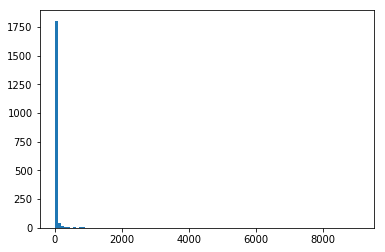

In [26]:
So within unique ones, we have 3635 as Nulls, and 777 as 0s. 
Also out of unique funders 974 have occurrences each one time. So it does not make sense to use this information for modeling the predictions of faultiness. As it has multiple cateogrical names.So remov 

In [ ]:
So out of these funders 1898 unique funders 974 are unique. 

In [20]:
(np.unique(data.funder, return_counts=True)[1]).shape[0]

1898

In [ ]:
data['installer']= data['installer'].astype('str')

In [62]:
pd.DataFrame(np.unique(data.installer, return_counts=True)[0],np.unique(data.installer, return_counts=True)[1] )

,0
3,-
777,0
1,A.D.B
4,AAR
29,ABASIA
1,ABD
1,ABDALA
1,ABDUL
2,AC
3,ACORD


In [64]:
np.unique(data.num_private, return_counts=True)

(array([   0,    1,    2,    3,    4,    5,    6,    7,    8,    9,   10,
          11,   12,   14,   15,   16,   17,   20,   22,   23,   24,   25,
          26,   27,   30,   32,   34,   35,   38,   39,   41,   42,   45,
          47,   50,   55,   58,   60,   61,   62,   65,   80,   87,   93,
          94,  102,  111,  120,  131,  136,  141,  150,  160,  180,  213,
         240,  280,  300,  450,  668,  672,  698,  755, 1402, 1776]),
 array([58643,    73,    23,    27,    20,    46,    81,    26,    46,
            4,     4,    11,     5,     3,    35,     8,    17,    14,
            6,     1,     5,    12,     2,     2,     1,    40,    10,
            1,     4,    30,    10,     1,    36,    21,     5,     1,
            4,     1,     3,     1,    22,    15,     1,    28,     1,
           20,     1,     7,     1,     1,     1,     6,     1,     1,
            1,     1,     1,     1,     1,     1,     1,     1,     1,
            1,     1]))